In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [2]:
y.shape, tx.shape
y.shape[0]

10000

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [3]:
def compute_cost(y, tx, w):
    """calculate the cost.

    you can calculate the cost by mse or mae.
    """
    N = y.shape[0]
    e = y-np.dot(tx,w)
    return 1/(2*N)*np.dot(e.T,e)

# Grid Search

Fill in the function `grid_search()` below:

In [4]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    for i in range(w0.shape[0]):
        for j in range(w1.shape[0]):
            w = np.array([w0[i], w1[j]])
            loss[i,j] = compute_cost(y, tx, w.T)    
    return loss

Let us play with the grid search demo now!

In [5]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

ImportError: No module named 'grid_search'

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [6]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    e = y - np.dot(tx, w)
    
    return -1/N*np.dot(tx.T, e)

In [7]:
w = np.array([50, 10])
compute_gradient(y, tx, w.T)

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_cost(y, tx, w)
        gradient = compute_gradient(y, tx, w)

        w = w - gamma*gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

ImportError: No module named 'grid_search'

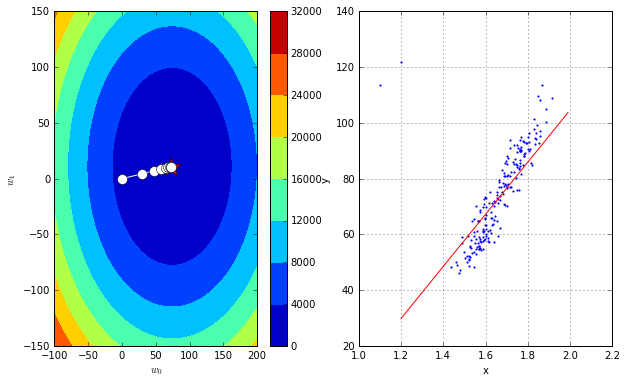

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    """Compute the gradient."""
    N = y.shape[0]
    e = y - np.dot(tx, w)
    
    return -1/N*np.dot(tx.T, e)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        batch_iterator = batch_iter(y, tx, batch_size)
        batch_y, batch_tx = next(batch_iterator)
        gradient = compute_stoch_gradient(batch_y, batch_tx, w)

        w = w - gamma*gradient
        loss = compute_cost(batch_y, batch_tx, w)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        # store w and loss
        ws.append(w)
        losses.append(loss)
    return losses, ws

#stochastic_gradient_descent(y, tx, np.array([0, 0]), 32, 20, 0.4)

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=850.981713374492, w0=28.841258435300656, w1=7.608233672093021
Gradient Descent(1/49): loss=335.2842803437488, w0=46.34232697345188, w1=5.111234576283303
Gradient Descent(2/49): loss=49.164198835212204, w0=53.956729304910205, w1=1.7254177393888792
Gradient Descent(3/49): loss=87.8493370701527, w0=63.93259242910851, w1=5.854016619496904
Gradient Descent(4/49): loss=0.2676731867527795, w0=64.5737160304233, w1=5.4700036721186445
Gradient Descent(5/49): loss=3.59202626629476, w0=68.39282873921684, w1=8.882046076256797
Gradient Descent(6/49): loss=134.3120211632121, w0=75.58368843088374, w1=22.861284875312617
Gradient Descent(7/49): loss=5.16944978016797, w0=79.05879980931257, w1=20.226769706063504
Gradient Descent(8/49): loss=821.6185244308202, w0=86.2312016112771, w1=1.0457459639603925
Gradient Descent(9/49): loss=0.1776037928086186, w0=85.65316635101462, w1=0.6499149287379691
Gradient Descent(10/49): loss=116.29184442382177, w0=70.86732817925254, w1=24.1749190

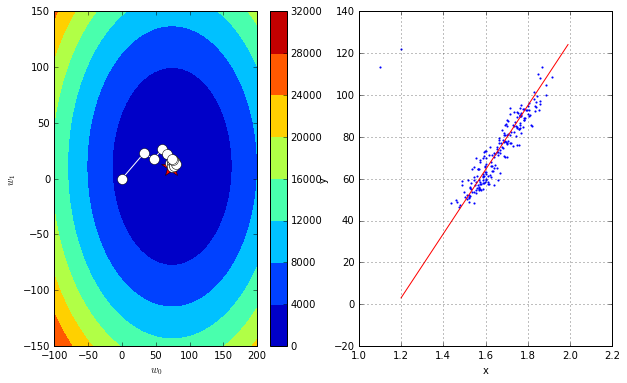

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))